# Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
insurance.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## Data Visualization

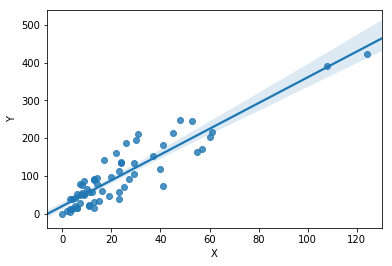

In [6]:
# Draw a scatterplot for insurance dataset
sns.regplot(x='X',y='Y',data=insurance)

This tutorial is broken down into the following parts:

- Calculate Mean and Variance.
- Calculate Covariance.
- Estimate Coefficients.
- Split Dataset.
- Make Predictions.
- Calculate Error.
- Predict Insurance.

These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.

## Calculate Mean and Variance 

In [7]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values)/len(values)

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])/len(values)

# Check your mean and variance functions
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x_mean, y_mean = mean(x), mean(y)
x_var, y_var = variance(x, x_mean), variance(y, y_mean)
print('x stats: mean=%.3f variance=%.3f' % (x_mean, x_var))
print('y stats: mean=%.3f variance=%.3f' % (y_mean, y_var))

x stats: mean=3.000 variance=2.000
y stats: mean=2.800 variance=1.760


## Calculate Covariance

In [8]:
# Calculate covariance between x and y
def covariance(x, x_mean, y, y_mean):
    return sum([(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))])/len(x)


# Check your covariance function
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x_mean, y_mean = mean(x), mean(y)
covar = covariance(x, x_mean, y, y_mean)
print('Covariance: %.3f' % (covar))

Covariance: 1.600


## Estimate Coefficients 

In [9]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - (b1 * x_mean)
    return [b0, b1]

# Check your coefficients function
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: b0=%.3f, b1=%.3f' % (b0, b1)) # Should give b0=0.4 and b1=0.8

Coefficients: b0=0.400, b1=0.800


## Split Dataset

In [10]:
# Split a dataset into a train and test set (without sci-kit learn)
def train_test_split(dataset, split):
    dataset = dataset.copy()
    np.random.shuffle(dataset)
    seg = round(split*len(dataset))
    train_data = dataset[:seg]
    test_data = dataset[seg:]
    return [train_data,test_data]

## Make Predictions

In [11]:
# Use simple linear regression to return predictions on test set.
def simple_linear_regression(train, test):
    b0, b1 = coefficients(train)
    predicted = [b0 + (b1 * i) for i in test]
    return predicted

## Calculate Error

In [12]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / len(actual)
    return np.sqrt(mean_error)

## Predict Insurance

In [13]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, error_metric, *args):
    train, test = train_test_split(dataset, split)
    x_test = [row[0] for row in test]
    predicted = algorithm(train, x_test, *args)
    y_test = [row[-1] for row in test]
    error = error_metric(y_test, predicted)
    return error

In [14]:
# Find rmse for Insurance dataset
split = 0.7
rmse = evaluate_algorithm(insurance.values, simple_linear_regression, split, rmse_metric)
print('RMSE: %.3f' % (rmse))

RMSE: 34.522
